# Sample code to test features of 'NumPy', 'Matplotlib' and 'Scipy'
---
Importing includes

In [90]:
%matplotlib inline
%pylab inline

from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import theano
import numpy as np
from theano import tensor as T
from numpy.linalg import inv

Populating the interactive namespace from numpy and matplotlib


Testing variable assignment and operations in python

In [3]:
x = 2
print(x)
y = x**2
print(y)

2
4


Extra: Testing **Theano** capabalities in handling symbolic variables

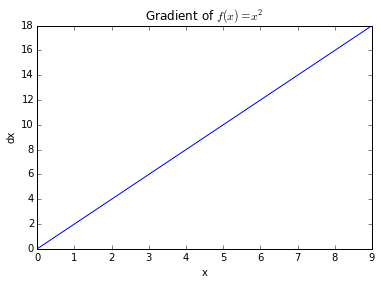

In [4]:
# Theano symbolic gradient example
B = T.scalar('E')
R = T.sqr(B)
A = T.grad(R,B)
Z = theano.function([B], A)

# Theano symbolic gradient example - Numeric
a = range(10)
da= range(10)
for idx,x in enumerate(a): 
    da[idx] = Z(x)
plt.plot(a,da)
plt.xlabel('x')
plt.ylabel('dx')
plt.title('Gradient of $f(x)=x^2$')
plt.show()

# Simple Linear Regression
Let $y = 3x + 2 + 10*n$ be the equation of a line, where $n \sim \eta(0,1)$ is standard normal distribution.

Let x = [1:100]. We will plot the scatter plot of y vs x

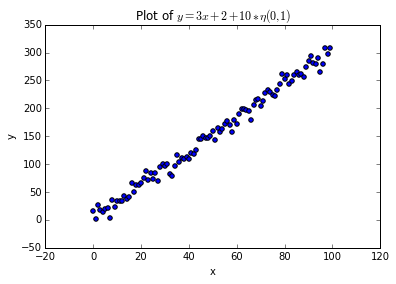

In [2]:
a = 3
b = 2
N = 100
# y = ax+b
x = np.reshape(range(N),(N,1))
y = a*x + b + 10*np.random.randn(N,1)

#plot
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y = 3x+2 + 10*\eta (0,1)$')
plt.show()

From linear regression using the model $$p(y_i/\mathbf{x_i}) = \eta(y_i/\mathbf{w}^T\mathbf{x_i},\sigma^2)$$
We have $$ \mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} $$
Now we will plot the original points and the line fitted using linear regression.

a =  [ 3.01346409] b =  [ 2.61683128]


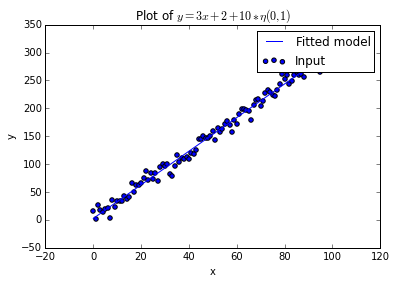

In [58]:
# Linear regression (MSE)
# Augment x with 1
X = np.hstack((np.ones((N,1)),x))
w = np.dot(inv(X.T.dot(X)),X.T.dot(y))
print('a = ',w[1],'b = ',w[0])
plt.scatter(x,y)
plt.plot(x,X.dot(w))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Fitted model','Input'])
plt.title('Plot of $y = 3x+2 + 10*\eta (0,1)$')
plt.show()

In [95]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

# Animation: MSE gradient descent
fig1 = plt.figure()

def init():
    line.set_data([], [])
    return line,

def update_w(i):
    global w
    off = 2*a*X.T.dot((X.dot(w)-y))
    w = w - off
    line.set_data(x,X.dot(w))
    return line,
    
X = np.hstack((np.ones((N,1)),x))
w = np.random.rand(X.shape[1],1)
ax = plt.axes(xlim=(-20, 120), ylim=(-50, 350))
line, = ax.plot([], [], lw=2)

a = 0.0000001

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Fitted model','Input'])
plt.title('Plot of $y = 3x+2 + 10*\eta (0,1)$')

line_ani = animation.FuncAnimation(fig1, update_w,init_func=init, frames=100, interval=25, blit=True)
#plt.show()
display_animation(line_ani)